# Housing Analysis
**Author**: Eric Wehmueller

***

## Overview

This project is the second project for Flatiron School's bootcamp program in Data Science.  We are being placed into a hypothetical situation as a Data Scientist and hoping to provide value to our business for the scenario we are given.


## Business Problem

I have been hired by a real estate agency that helps homeowners sell homes.  For this project, I am to provide expected/estimated home prices to homeowners based on the logistics of their home.  This can also give insight on how home renovations might increase the estimated value of their homes, and what type of potential renovations are best.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Investigation and Cleaning

To start, we have access to the King County House Sales dataset.  Let's take a look at this to get a feel for what our starting point is and what raw data we have to work with.

In [2]:
df_original = pd.read_csv("data\kc_house_data.csv")

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df_original.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570



Per the project description, I will be ignoring the following features: date, view, sqft_above, sqft_basement, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15. For the time being, I am trying to make my modeling phase in this project as simple as possible.

In [5]:
df_col_drops = df_original.drop(columns=['id', 'date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'])
display(df_col_drops)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009,47.6993,-122.346
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014,47.5107,-122.362
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009,47.5944,-122.299
21595,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004,47.5345,-122.069


In [6]:
df_col_drops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
 10  lat          21597 non-null  float64
 11  long         21597 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 2.0 MB


Waterfront appears to have ~2000 null values. Let's investigate what values are in this column to see what we can do about the null values.

Which ones are the most important features?

In [7]:
df_col_drops.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

Only 146 have a waterfront view. Since this is a binary-filled column, I believe we can fill in all NaNs with a zero value. This makes sense, as NaNs almost certainly denotes the absence of a waterfront view.

In [8]:
df_col_drops.waterfront.fillna(0, inplace=True)
display(df_col_drops.head())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,47.6168,-122.045


In [9]:
df_col_drops.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,3.409825,7.657915,1970.999676,47.560093,-122.213982
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.650546,1.173200,29.375234,0.138552,0.140724
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,47.155900,-122.519000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,47.471100,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,47.571800,-122.231000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000,47.777600,-121.315000


In [10]:
df_col_drops.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built', 'lat', 'long'],
      dtype='object')

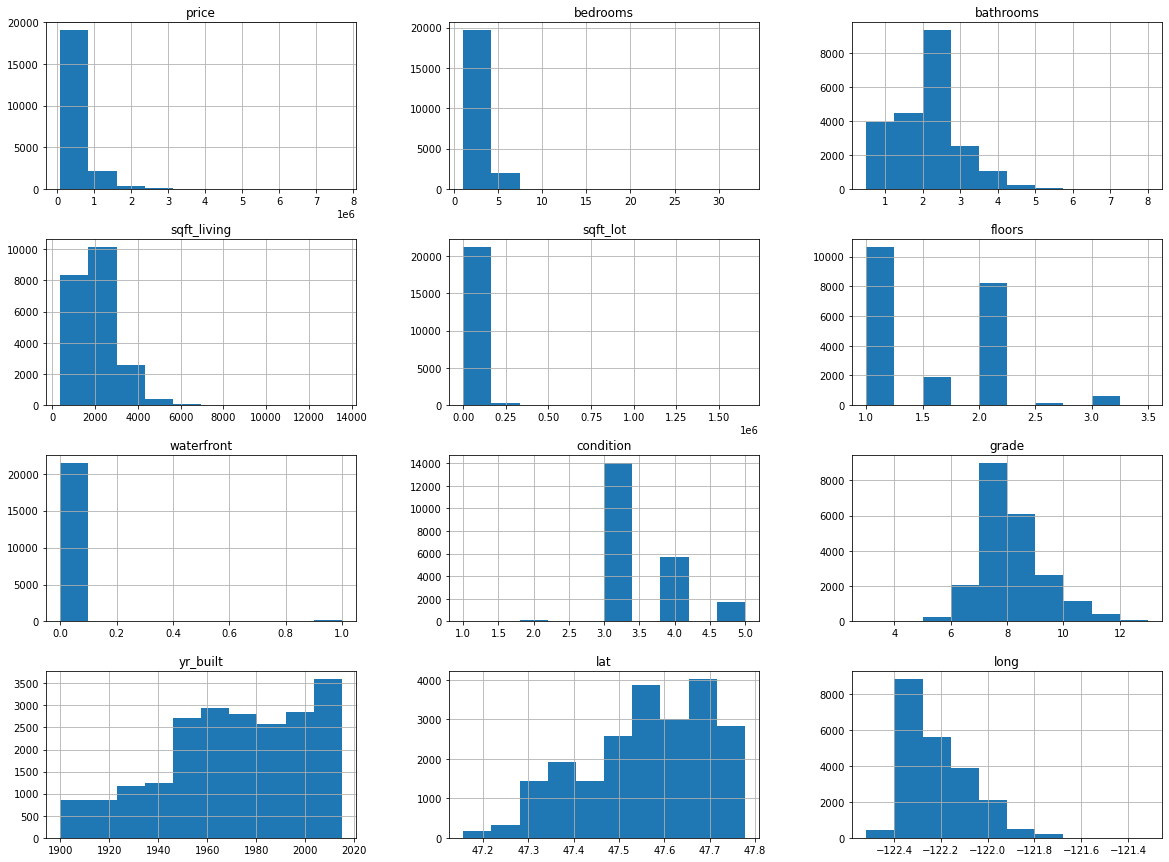

In [11]:
#iterating over all columns except id to see general distributions

df_col_drops.hist(figsize = (20,15));

It appears that we have some outliers in this data, so it's a little difficult to get a sense for what some the distrubutions actually are. 

Specifically, I'm seeing a single entry priced at 7.7 million. 

I also can't really tell what the bedroom distribution is with an outlier of 33. 

sqft_lot has only a single column in this view and the mean is vastly different from the median. We will need to take a closer look at this as well. 

Condition and grade seem to be relatively normal.

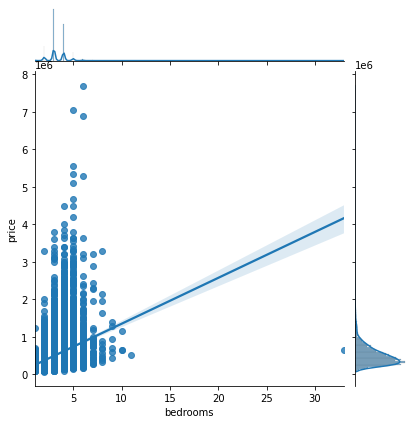

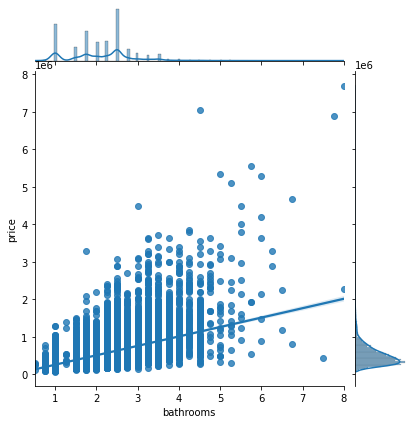

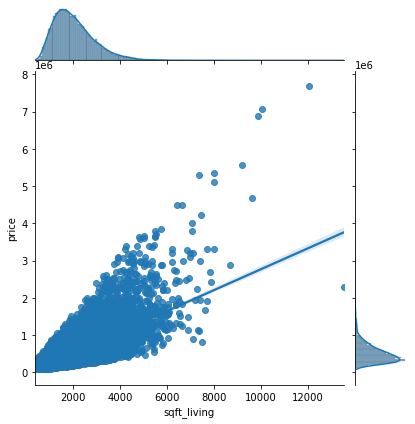

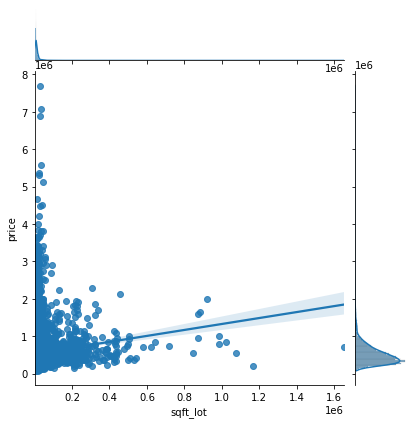

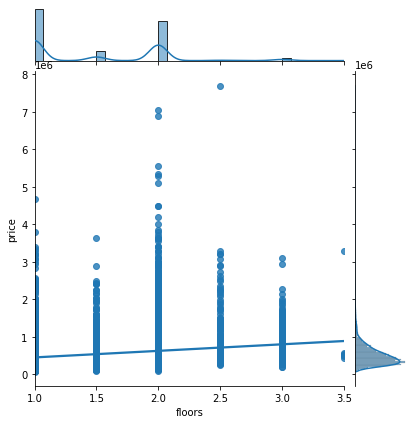

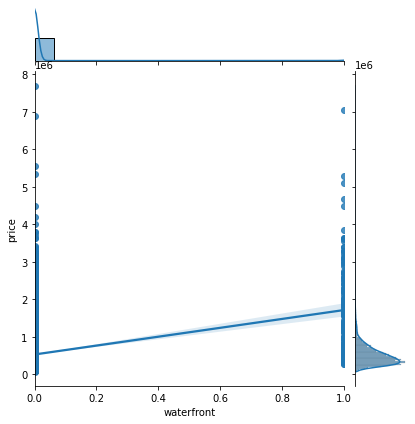

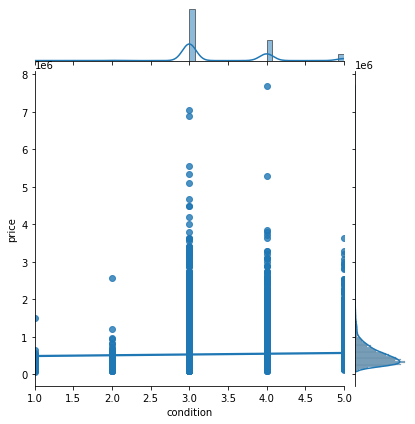

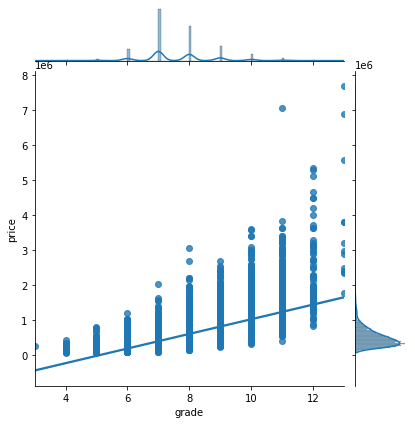

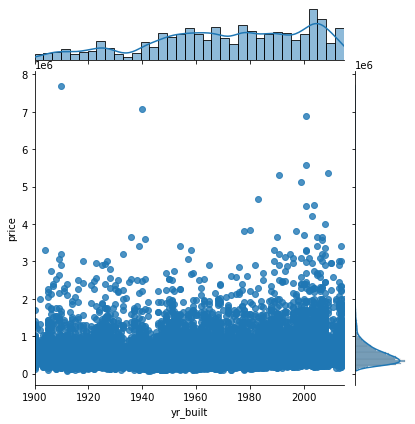

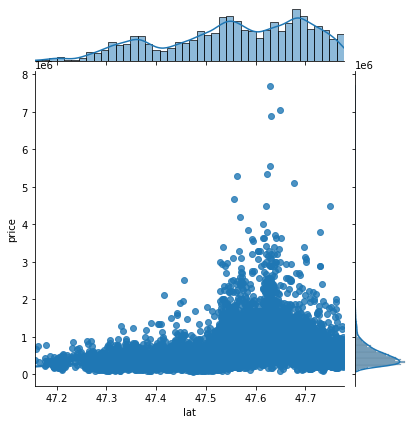

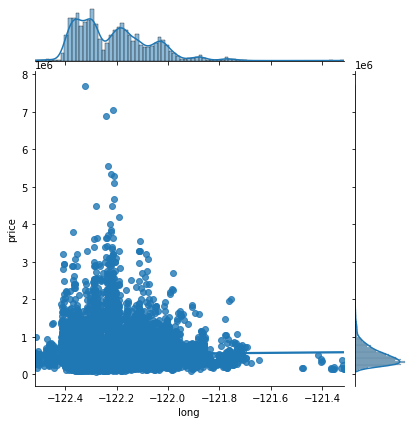

In [12]:
#Check for linearity via jointplots
for col_name in df_col_drops.columns[1:]:
    sns.jointplot(x=col_name, y='price', data=df_col_drops, kind='reg');

It worth noting that these jointplots reveal several of these columns to have linear relations with price.  

**Strong Linear Relation**: sqft_living, grade

**Somehwat Linear**: bathrooms, sqft_lot, waterfront

**Little to No Linear Relation**: bedrooms, floors, condition, yr_built, lat, long

It appears that the features that have the largest impact on the price of a home are the square footage of the home, as well as the Grade- this rating is given by the King County Housing System. I have copied this system below for more context.

***
1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

## Feature Engineering

Two fields jump out at me: latitude and longitude. As we already know, this data is taken from the King County Housing dataset, which includes the city of Seattle.  Let's engineer a feature that determines the distance from "downtown" using lat and long.



In [13]:
#using 47.605° N, 122.334° W as the exact point for downton (via Google)
dtwn_lat = 47.605
dtwn_long = -122.334
dtwn_coords = (dtwn_lat, dtwn_long)
print(type(dtwn_coords))

second_coords = (df_col_drops['lat'][0], df_col_drops['long'][0])
print(second_coords)

<class 'tuple'>
(47.5112, -122.257)


In [14]:
import haversine as hs

#solving for a single location, in kilometers
hs.haversine(dtwn_coords, second_coords)

11.923605090619347

In [15]:
#creating feature column
df_col_drops['dist_to_dtwn'] = df_col_drops.lat
for index, row in df_col_drops.iterrows():
    df_col_drops['dist_to_dtwn'][index] = hs.haversine(dtwn_coords, point2=(df_col_drops['lat'][index], df_col_drops['long'][index]) )

<ipython-input-15-edcbe8011a22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col_drops['dist_to_dtwn'][index] = hs.haversine(dtwn_coords, point2=(df_col_drops['lat'][index], df_col_drops['long'][index]) )


In [16]:
df_col_drops.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long,dist_to_dtwn
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,47.5112,-122.257,11.923605
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,47.7210,-122.319,12.947452
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,47.7379,-122.233,16.600484
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,47.5208,-122.393,10.356458
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,47.6168,-122.045,21.704132
5,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,2001,47.6561,-122.005,25.300013
6,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1995,47.3097,-122.327,32.840124
7,291850.0,3,1.50,1060,9711,1.0,0.0,3,7,1963,47.4095,-122.315,21.785433
8,229500.0,3,1.00,1780,7470,1.0,0.0,3,7,1960,47.5123,-122.337,10.310242
9,323000.0,3,2.50,1890,6560,2.0,0.0,3,7,2003,47.3684,-122.031,34.792535


In [17]:
#dropping these so we don't confuse our model- dist_to_dtwn is derived from lat and long
df_col_drops = df_col_drops.drop(['lat', 'long'], axis=1)

# Modeling 
***
## Model 1

In [18]:
outcome = 'price'
x_cols = list(df_col_drops.columns)
x_cols.remove(outcome)
print(x_cols)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'dist_to_dtwn']


In [19]:
train, test = train_test_split(df_col_drops)

In [20]:
for col in x_cols:
    train[col] = (train[col] - train[col].mean())/train[col].std()
display(train.head())
print(len(train), len(test))

<ipython-input-20-f07e438ec62e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = (train[col] - train[col].mean())/train[col].std()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,dist_to_dtwn
2823,838300.0,2.815174,0.501020,1.825008,-0.049955,-0.910462,-0.079605,-0.629382,1.151624,-0.133095,-0.717236
16643,660000.0,-0.401799,-0.471771,-0.825533,-0.220626,0.016599,-0.079605,2.434669,-0.560904,-1.799860,-1.288506
14250,775000.0,-0.401799,-1.444561,-0.054269,-0.260059,0.016599,-0.079605,0.902644,-0.560904,-2.140016,-0.971689
10689,499950.0,0.670526,0.501020,0.847349,-0.277414,0.943659,-0.079605,-0.629382,0.295360,1.125483,0.417319
18368,455000.0,-0.401799,0.501020,-0.521372,-0.171536,0.943659,-0.079605,-0.629382,-0.560904,0.547217,-0.241028


16197 5400


In [21]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     3644.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:51:57   Log-Likelihood:            -2.2085e+05
No. Observations:               16197   AIC:                         4.417e+05
Df Residuals:                   16186   BIC:                         4.418e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.389e+05   1588.623    339.232      0.000    5.36e+05    5.42e+05
bedrooms      -3.24e+04   2023.110    -16.016      0.000   -3.64e+04   -2.84e+04
bathrooms     2.244e+04   2870.364      7.819      0.000    1.68e+04    2.81e+04
sqft_living    1.83e+05   3256.617     56.203      0.000    1.77e+05    1.89e+05
sqft_lot       1.14e+04   1678.583      6.793      0.000    8111.885    1.47e+04
floors       -5592.1484   2018.146     -2.771      0.006   -9547.937   -1636.360
waterfront    5.769e+04   1604.170     35.965      0.000    5.45e+04    6.08e+04
condition      1.65e+04   1731.674      9.529      0.000    1.31e+04    1.99e+04
grade         1.243e+05   2744.570     45.301      0.000    1.19e+05     1.3e+05
yr_built      -5.16e+04   2388.561    -21.601      0.000   -5.63e+04   -4.69e+04
dist_to_dtwn -1.002e+05   1880.582    -53.278      0.000   -1.04e+05   -9.65e+04
==============================================================================
Omnibus:                    13885.546   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1470308.350
Skew:                           3.595   Prob(JB):                         0.00
Kurtosis:                      49.119   Cond. No.                         4.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-values are less than 0.05 for our selected columns. Let's take a look at our residuals for normality.

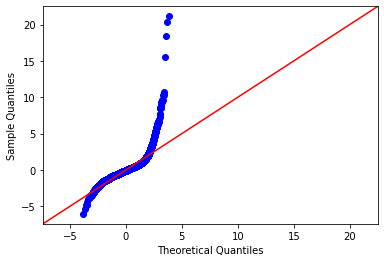

In [22]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

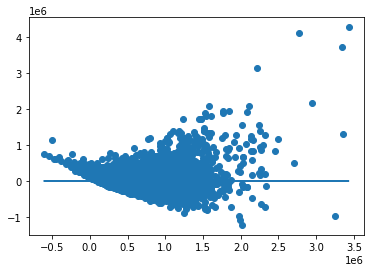

In [23]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

This doesn't look great, as our QQ plot looks incorrect and we have a pronounced funnel shape on our check for homoscedasticity. We are going to need to make some changes.


In [ ]:
lr= LinearRegression()
lr.fit(X_train, y_train)

# Use Linear Regression to make predictions for train and test data
y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)


# Calculate Root Mean Square Error
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

## Models Addressing Multicollinearity

For this iteration, I'm going to remove some outliers. (log transformation?)

I recall having the most issues determining the normal distributions of sqft_lot and bedrooms, so I'm going to filter on both.

<AxesSubplot:>

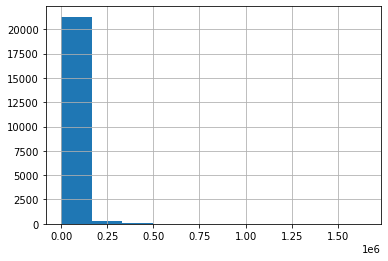

In [24]:
df_col_drops.sqft_lot.hist()

In [25]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q,df_col_drops.sqft_lot.quantile(q=q)))

0.8 percentile: 12182.399999999998
0.81 percentile: 12558.0
0.82 percentile: 13055.439999999995
0.83 percentile: 13503.68
0.84 percentile: 14197.0
0.85 percentile: 15000.0
0.86 percentile: 15716.040000000012
0.87 percentile: 16646.640000000003
0.88 percentile: 18000.0
0.89 percentile: 19550.0
0.9 percentile: 21371.600000000006
0.91 percentile: 24149.360000000015
0.92 percentile: 28505.119999999995
0.93 percentile: 34848.0
0.94 percentile: 37643.19999999999
0.95 percentile: 43307.200000000026
0.96 percentile: 50655.28
0.97 percentile: 67381.7199999999
0.98 percentile: 107157.0
0.99 percentile: 213008.0


I think filtering out homes with greater than 100k sqaure feet is acceptable here.

<AxesSubplot:>

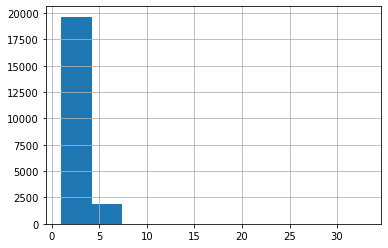

In [26]:
df_col_drops.bedrooms.hist()

In [27]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q,df_col_drops.bedrooms.quantile(q=q)))

0.8 percentile: 4.0
0.81 percentile: 4.0
0.82 percentile: 4.0
0.83 percentile: 4.0
0.84 percentile: 4.0
0.85 percentile: 4.0
0.86 percentile: 4.0
0.87 percentile: 4.0
0.88 percentile: 4.0
0.89 percentile: 4.0
0.9 percentile: 4.0
0.91 percentile: 4.0
0.92 percentile: 5.0
0.93 percentile: 5.0
0.94 percentile: 5.0
0.95 percentile: 5.0
0.96 percentile: 5.0
0.97 percentile: 5.0
0.98 percentile: 5.0
0.99 percentile: 6.0


In [28]:
df_col_drops.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

I will also be filtering out all houses with more than 6 bedrooms, removing about 2% of the total entries. (may overlap with sq footage)

I will also include a log transformation to the price feature, as this may help fix our QQplot from Model 1.

In [29]:
orig_tot = len(df_col_drops)
df_outlier_filter = df_col_drops.copy()
df_outlier_filters = df_outlier_filter[df_outlier_filter.sqft_lot < 100000] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df_outlier_filters))/orig_tot)

df_outlier_filters = df_outlier_filters[df_outlier_filters.bedrooms < 7] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df_outlier_filters))/orig_tot)

#applying a log transformation to the price, which is right skewed
df_outlier_filter['price'] = np.log(df_outlier_filter['price'])

train2, test2 = train_test_split(df_outlier_filters)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model2 = ols(formula=formula, data=train2).fit()
model2.summary()

Percent removed: 0.021530768162244755
Percent removed: 0.024355234523313424


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     3586.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:51:58   Log-Likelihood:            -2.1509e+05
No. Observations:               15803   AIC:                         4.302e+05
Df Residuals:                   15792   BIC:                         4.303e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.061e+06   1.53e+05     19.989      0.000    2.76e+06    3.36e+06
bedrooms     -4.242e+04   2340.072    -18.129      0.000    -4.7e+04   -3.78e+04
bathrooms     3.791e+04   3713.652     10.208      0.000    3.06e+04    4.52e+04
sqft_living    196.2522      3.659     53.631      0.000     189.080     203.425
sqft_lot         0.8723      0.154      5.673      0.000       0.571       1.174
floors       -4522.2195   3722.065     -1.215      0.224   -1.18e+04    2773.452
waterfront    7.263e+05   2.02e+04     35.894      0.000    6.87e+05    7.66e+05
condition     2.642e+04   2607.111     10.133      0.000    2.13e+04    3.15e+04
grade          1.04e+05   2342.551     44.407      0.000    9.94e+04    1.09e+05
yr_built     -1820.3170     80.036    -22.744      0.000   -1977.196   -1663.438
dist_to_dtwn -9448.5424    181.882    -51.949      0.000   -9805.052   -9092.033
==============================================================================
Omnibus:                    12690.511   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1097671.697
Skew:                           3.285   Prob(JB):                         0.00
Kurtosis:                      43.297   Cond. No.                     1.52e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

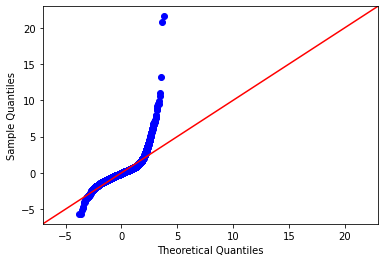

In [30]:
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

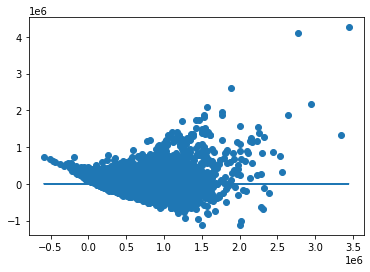

In [31]:
plt.scatter(model2.predict(train2[x_cols]), model2.resid)
plt.plot(model2.predict(train2[x_cols]), [0 for i in range(len(train2))])

Similar problems as last time, but our OLS has alerted us that there is strong collinearity. Let's investigate what we should remove.

In [32]:
X = df_col_drops[x_cols]
X['constant'] = np.ones(X.shape[0])
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.6311136630472653),
 ('bathrooms', 3.215688966233134),
 ('sqft_living', 4.211173170919058),
 ('sqft_lot', 1.1150457494029746),
 ('floors', 1.6055072567823685),
 ('waterfront', 1.0219826889310346),
 ('condition', 1.1874067595264461),
 ('grade', 3.0015991231227797),
 ('yr_built', 2.240108337334204),
 ('dist_to_dtwn', 1.4004289073409446)]

You usually want to remove variables with a cif of 5~10 or greater, indicating that they are displaying multicollinearity with other variables in the feature set. None of these values are really in that range.


Going back to the drawing board, let's look at a multicolinearity heatmap to determine the columns to remove from our model.

In [33]:
first_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'dist_to_dtwn']
corr = df_col_drops[first_features].corr()
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,dist_to_dtwn
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.155670,0.058718
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.507173,0.084731
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.318152,0.076442
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.052946,0.243472
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.489193,0.004790
waterfront,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,-0.024487,-0.014859
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.361592,-0.073569
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.447865,0.008441
yr_built,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.361592,0.447865,1.000000,0.389471
dist_to_dtwn,0.058718,0.084731,0.076442,0.243472,0.004790,-0.014859,-0.073569,0.008441,0.389471,1.000000


<AxesSubplot:>

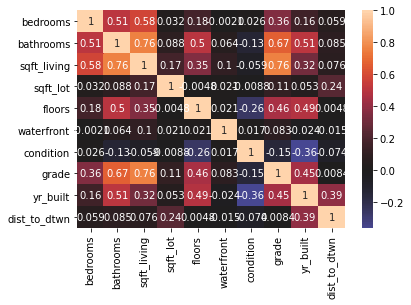

In [34]:
sns.heatmap(corr, center=0, annot=True)

sqft_living and grade = 0.76

sqft_living and bathrooms = 0.76

grade and bathrooms = 0.67

Let's remove grade and bathrooms for this model. We will also use our previous outlier filter, as this seems to be a step in the right direction.

In [35]:
train3, test3 = train_test_split(df_outlier_filter)

x_cols = ['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'yr_built', 'dist_to_dtwn']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model3 = ols(formula=formula, data=train3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     4095.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:52:00   Log-Likelihood:                -3669.3
No. Observations:               16197   AIC:                             7357.
Df Residuals:                   16188   BIC:                             7426.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.0628      0.216     55.938      0.000      11.640      12.485
bedrooms        -0.0376      0.003    -11.998      0.000      -0.044      -0.031
sqft_living      0.0004   3.49e-06    117.473      0.000       0.000       0.000
sqft_lot      1.115e-06   6.71e-08     16.618      0.000    9.83e-07    1.25e-06
floors           0.0846      0.005     15.766      0.000       0.074       0.095
waterfront       0.5389      0.030     17.922      0.000       0.480       0.598
condition        0.0645      0.004     16.244      0.000       0.057       0.072
yr_built         0.0001      0.000      1.256      0.209   -7.77e-05       0.000
dist_to_dtwn    -0.0206      0.000    -78.792      0.000      -0.021      -0.020
==============================================================================
Omnibus:                      368.735   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              523.063
Skew:                          -0.261   Prob(JB):                    2.62e-114
Kurtosis:                       3.709   Cond. No.                     3.67e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

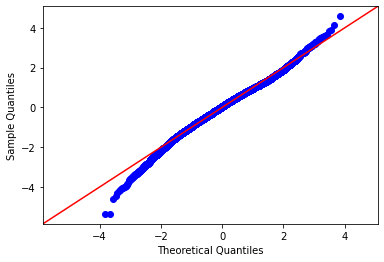

In [36]:
fig = sm.graphics.qqplot(model3.resid, dist=stats.norm, line='45', fit=True)

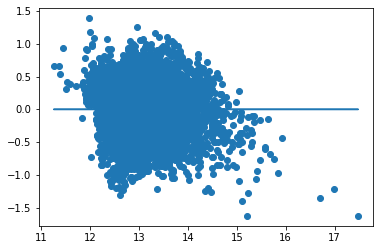

In [37]:
plt.scatter(model3.predict(train3[x_cols]), model3.resid)
plt.plot(model3.predict(train3[x_cols]), [0 for i in range(len(train3))])

This is a modeling choice. There are pros and cons to this approach versus the first model.  Removing multiple components has substantially diminished the model's performance, as indicated by the r-squared value.  However, multicollinearity between the features has been reduced.

## Model 4

Our QQ plots are less than ideal in previous models. Let's see if we can fix that by using a transform on the appropriate features.

In [38]:
for col_name in df_outlier_filter.columns[1:]:
    print(col_name)
    print(df_outlier_filter[col_name].skew())

bedrooms
2.023641235344595
bathrooms
0.5197092816403838
sqft_living
1.473215455425834
sqft_lot
13.072603567136046
floors
0.6144969756263127
waterfront
12.039584643829357
condition
1.0360374245132955
grade
0.7882366363846076
yr_built
-0.4694499764949978
dist_to_dtwn
0.769367697269784


'sqft_lot' seems to be the main issue with the highest skew coefficient. I'm not sure if I should apply this to waterfront. We may need to use another method here, or look elsewhere for model improvements.

In [39]:
#only run once
df_outlier_filter['sqft_lot'] = np.log(df_outlier_filter['sqft_lot'])
df_outlier_filter['sqft_lot'].skew()

0.9625003856495555

<AxesSubplot:>

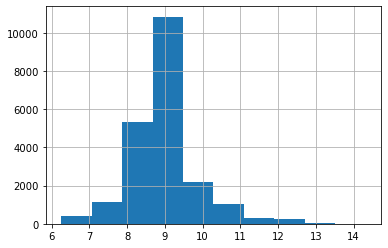

In [40]:
df_outlier_filter['sqft_lot'].hist()

In [41]:
df_outlier_filter['bedrooms'] = np.log(df_outlier_filter['bedrooms'])
df_outlier_filter['bedrooms'].skew()

-0.6805637280656164

In [42]:
x_cols = list(df_outlier_filter.columns)
x_cols.remove(outcome)

train4, test4 = train_test_split(df_outlier_filter)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model4 = ols(formula=formula, data=train4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     4386.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:52:00   Log-Likelihood:                -2017.8
No. Observations:               16197   AIC:                             4058.
Df Residuals:                   16186   BIC:                             4142.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       14.2873      0.217     65.743      0.000      13.861      14.713
bedrooms        -0.0559      0.010     -5.794      0.000      -0.075      -0.037
bathrooms        0.0632      0.005     12.501      0.000       0.053       0.073
sqft_living      0.0002   4.96e-06     38.240      0.000       0.000       0.000
sqft_lot         0.0608      0.003     19.029      0.000       0.055       0.067
floors           0.0586      0.005     11.056      0.000       0.048       0.069
waterfront       0.4788      0.026     18.183      0.000       0.427       0.530
condition        0.0588      0.004     16.241      0.000       0.052       0.066
grade            0.1819      0.003     57.564      0.000       0.176       0.188
yr_built        -0.0018      0.000    -16.429      0.000      -0.002      -0.002
dist_to_dtwn    -0.0186      0.000    -70.486      0.000      -0.019      -0.018
==============================================================================
Omnibus:                      293.924   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              460.629
Skew:                          -0.185   Prob(JB):                    9.45e-101
Kurtosis:                       3.739   Cond. No.                     2.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

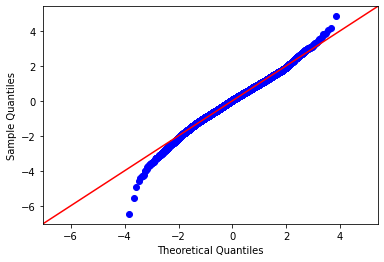

In [43]:
fig = sm.graphics.qqplot(model4.resid, dist=stats.norm, line='45', fit=True)

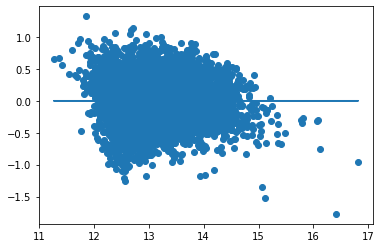

In [44]:
plt.scatter(model4.predict(train4[x_cols]), model4.resid)
plt.plot(model4.predict(train4[x_cols]), [0 for i in range(len(train4))])

This is a nice improvement. This is our best model thus far. It passes the normality check from looking at the QQ plot and it is homoscedastic.

Interpreting this model:

R-squared: 73.1% variation in the price can be explained by all of our feature columns.

Durbin-waton: A value preferred between 1-2 implies that the regression results are reliable from the side of homoscedasticity.

The highest coefficients belong to Grade and Waterfront: namely, what grade the home has been given by the King County Housing System.  Additionally, having a waterfront view as a part of your home largely impacts the price.

When needed, we can now use this model to give us prediction values for an estimated price, given the values for the features of a home we are trying to sell.  Obviously, someone would be unable to renovate their home to suddenly have a waterfront view, but doing something like adding a bathroom (the 3rd highest coefficient) seems to also have a significant impact of the expected price of a home for this model as well.

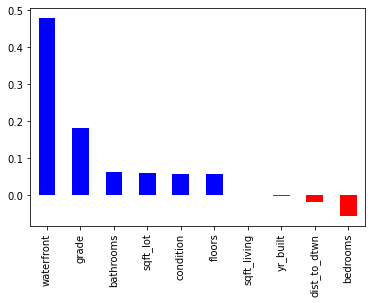

In [55]:
model4.params[1:].sort_values(ascending=False).plot.bar(color=['blue','blue','blue','blue','blue','blue','blue','red','red','red']);

This is a visualization of our coefficients. To compare, I have taken the absolute value of each in the series, but made sure to indicate negative coefficients in red columns.

## Conclusion

I believe the best model is Model 4, where the outliers have been filtered out and none of the features are removed . Although this suffers from multicollinearity, it has an r-squared value of ~0.73, which is the most accurate model in our analysis.

I believe this is acceptable within the context of this scenario. It affects the coefficients and p-values, but it does not influence the predicitons, precision of the predictions, and the statistics determining goodness of fit.  Our primary goal is to have a model to make predictions for us.

To further improve this, I would use more of the columns included in the original dataset to try to increase my r-squared value and hopefully fix the QQplot issues I was having for all of my models.